In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV ,SGDClassifier
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

In [2]:
file_path = "datasets\datos_CB.csv"
student_data = pd.read_csv(file_path)
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97341 entries, 0 to 97340
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  97341 non-null  int64  
 1   Unnamed: 0    97341 non-null  int64  
 2   ciclo         97341 non-null  int64  
 3   Cod.Asign     97341 non-null  int64  
 4   Asignatura    97341 non-null  object 
 5   Cod.Car.Sec   97341 non-null  object 
 6   Cod.Curso     97341 non-null  int64  
 7   Convocatoria  97341 non-null  int64  
 8   Anho          97341 non-null  int64  
 9   Semestre      97341 non-null  int64  
 10  Aprobado      97341 non-null  int64  
 11  Anho.Firma    97341 non-null  int64  
 12  Primer.Par    97341 non-null  int64  
 13  Segundo.Par   97341 non-null  int64  
 14  AOT           97341 non-null  int64  
 15  Primer.Rec    97341 non-null  int64  
 16  Segundo.Rec   97341 non-null  int64  
 17  Nota.Final    97341 non-null  object 
 18  Asis          97341 non-nu

In [3]:
columns = ['Unnamed: 0.1', 'Unnamed: 0', "Cod.Asign", 'Asis', '4P_60',"Cod.Curso", "Cod.Car.Sec", "Semestre",'Nota.Prom'] #el id_anony podriamos usar despues
if columns[0] in student_data:
    student_data.drop(columns,axis=1, inplace= True)
student_data.head()

,ciclo,Asignatura,Convocatoria,Anho,Aprobado,Anho.Firma,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,id_anony
0,1,CALCULO 3,1,2012,0,0,0,0,0,0,0,[0],es_253
1,1,FISICA 4,1,2012,0,2012,19,13,9,0,0,[0],es_254
2,1,FISICA 4,1,2012,1,2012,17,24,10,0,0,[3],es_255
3,1,FISICA 4,1,2012,0,0,0,0,0,0,0,[0],es_256
4,1,FISICA 4,1,2012,0,0,16,12,8,0,0,[0],es_257


In [4]:
#todo esto puede ser un diccionario con numpy unique y queda re loco
course = "ESTATICA"
condition = student_data["Asignatura"] == course
course_data = student_data[condition]
print(course_data.head())
course_data.drop(["Asignatura"],axis=1, inplace = True)
course_data.head()

      ciclo Asignatura  Convocatoria  Anho  Aprobado  Anho.Firma  Primer.Par  \
5258      2   ESTATICA             1  2012         0           0           2   
5259      2   ESTATICA             1  2012         0           0           6   
5260      2   ESTATICA             1  2012         1        2012          12   
5261      2   ESTATICA             1  2012         0           0           1   
5262      2   ESTATICA             1  2012         0           0           0   

      Segundo.Par  AOT  Primer.Rec  Segundo.Rec Nota.Final id_anony  
5258           13    0           0            0        [0]   es_469  
5259           11    0           0            0        [0]   es_470  
5260           24    0           0            0        [2]   es_175  
5261            1    0           0            0        [0]   es_910  
5262            0    0           0            0        [0]  es_1475  


C:\Users\josec\AppData\Local\Temp\ipykernel_33868\1374848725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_data.drop(["Asignatura"],axis=1, inplace = True)


,ciclo,Convocatoria,Anho,Aprobado,Anho.Firma,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,id_anony
5258,2,1,2012,0,0,2,13,0,0,0,[0],es_469
5259,2,1,2012,0,0,6,11,0,0,0,[0],es_470
5260,2,1,2012,1,2012,12,24,0,0,0,[2],es_175
5261,2,1,2012,0,0,1,1,0,0,0,[0],es_910
5262,2,1,2012,0,0,0,0,0,0,0,[0],es_1475


In [5]:
%%capture
print(np.unique(course_data["Anho"]))

In [6]:
course_data["Primer.Par"].describe()

count    4824.000000
mean        9.337894
std         5.849116
min         0.000000
25%         5.000000
50%        10.000000
75%        14.000000
max        24.000000
Name: Primer.Par, dtype: float64

In [7]:
approved = len(course_data[course_data["Aprobado"]==1])
not_approved = len(course_data[course_data["Aprobado"] == 0])
total = len(course_data["Aprobado"])
print(f"Approved: {approved}\nNot approved: {not_approved}\nTotal: {total}")

Approved: 1818
Not approved: 3006
Total: 4824


In [8]:
course_data = course_data.sort_values(by=['id_anony','Anho'])
last_id = course_data['id_anony'].iloc[0]
counter = 0
for index,row in course_data.iterrows():
    #print(index)
    if row['id_anony'] == last_id:
        counter += 1 
        course_data.loc[index,['Num.Intento']] = counter
    else:
        last_id = row['id_anony']
        course_data.loc[index,['Num.Intento']] = 1
        counter = 1
    #print(row['id_anony'])

In [9]:
course_data

,ciclo,Convocatoria,Anho,Aprobado,Anho.Firma,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,id_anony,Num.Intento
5591,2,1,2012,0,0,6,12,0,12,0,[0],es_1003,1.0
15050,2,1,2013,1,2013,6,19,8,42,0,"[1, 2]",es_1003,2.0
5511,2,1,2012,1,2012,15,16,0,0,0,[2],es_1026,1.0
5383,2,1,2012,0,2011,10,10,0,21,0,[1],es_104,1.0
14802,2,1,2013,1,2013,8,16,3,22,39,[2],es_104,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663,2,1,2012,1,2012,16,11,0,34,0,[2],es_93,1.0
14877,2,1,2013,0,0,0,0,0,0,0,[0],es_937,1.0
5570,2,1,2012,0,0,3,12,0,16,0,[0],es_943,1.0
15019,2,1,2013,1,2013,9,20,6,0,0,[2],es_943,2.0


In [10]:
df_train, df_test= train_test_split(course_data, test_size=0.2, random_state=0)
print(df_train.shape)
print(df_test.shape)


# Saving our training and testing data sets
'''
# Training Set
train_save_path = 'student_train.csv'
train_df.to_csv(train_save_path, index=False)

# Testing Set
test_save_path = os.path.join(os.getcwd(), 'student', 'student-por-test.csv')
test_df.to_csv(test_save_path, index=False)
'''

(3859, 13)
(965, 13)


"\n# Training Set\ntrain_save_path = 'student_train.csv'\ntrain_df.to_csv(train_save_path, index=False)\n\n# Testing Set\ntest_save_path = os.path.join(os.getcwd(), 'student', 'student-por-test.csv')\ntest_df.to_csv(test_save_path, index=False)\n"

In [11]:
# Dummy Encoding the Data
# Coverting categorical data to numerical dummy variables
#train_dummies_df = pd.get_dummies(df_train)
#test_dummies_df = pd.get_dummies(df_test)

# Separating training data into predictors and predictand
use_cols = [column for column in df_train.columns if column not in ['Aprobado']]
train_x = df_train[use_cols]
train_y = df_train['Aprobado']

# Separating testing data into predictors and predictand
test_x = df_test[use_cols]
test_y = df_test['Aprobado']

In [12]:
train_x.head()
train_x = train_x.drop(['Nota.Final'],axis=1)
train_x_noId = train_x.drop(['id_anony'],axis=1)

In [13]:
train_y.head()

25545    0
58713    0
95057    0
94875    0
36477    1
Name: Aprobado, dtype: int64

In [14]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3859 entries, 25545 to 58578
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ciclo         3859 non-null   int64  
 1   Convocatoria  3859 non-null   int64  
 2   Anho          3859 non-null   int64  
 3   Anho.Firma    3859 non-null   int64  
 4   Primer.Par    3859 non-null   int64  
 5   Segundo.Par   3859 non-null   int64  
 6   AOT           3859 non-null   int64  
 7   Primer.Rec    3859 non-null   int64  
 8   Segundo.Rec   3859 non-null   int64  
 9   id_anony      3859 non-null   object 
 10  Num.Intento   3859 non-null   float64
dtypes: float64(1), int64(9), object(1)
memory usage: 361.8+ KB


In [15]:
test_x = test_x.drop(['Nota.Final'],axis=1)
test_x_noId = test_x.drop(['id_anony'],axis=1)

In [16]:
def process(mod, x, y, test_x, test_y,course):
    model = mod.fit(x,y)
    predicted_y = model.predict(test_x)
    score = model.score(test_x,test_y)
    print(f"Model score for {course.lower()}: {score}")
    print(f"Parameters: \n{model.feature_names_in_}")
    print(f"iterations: {model.n_iter_}")
    print(f"coefs: {model.coef_}")

In [17]:
#a modo ilustrativo
default_LR = LogisticRegression(max_iter=1000)
process(default_LR,train_x_noId,train_y,test_x_noId,test_y,course)

Model score for estatica: 0.883937823834197
Parameters: 
['ciclo' 'Convocatoria' 'Anho' 'Anho.Firma' 'Primer.Par' 'Segundo.Par'
 'AOT' 'Primer.Rec' 'Segundo.Rec' 'Num.Intento']
iterations: [517]
coefs: [[ 0.12912371 -0.6249367  -0.00432846  0.00357237  0.10154156  0.08316712
   0.06374964  0.01053444 -0.03156738  0.0107612 ]]


# Droping some labels

In [20]:
def data_process(df):
    if 'ciclo' in df:
        df = df.drop(['ciclo','Segundo.Par','AOT','Primer.Rec','Segundo.Rec'],axis=1)
    if 'Nota.Final' in df:
        df = df.drop(['Nota.Final'],axis=1)
    df['Anho.Firma'] = np.where(df['Anho.Firma']==0, df['Anho'], df['Anho.Firma'])
    df = df.drop(['Anho.Firma'],axis=1)
    print(df)
    df = df.drop(['id_anony'],axis=1)
    return df


In [124]:
%%capture
new_train_x = data_process(train_x)

In [125]:
%%capture
new_test_x = data_process(test_x)

In [126]:
%%capture
new_x = data_process(course_data)
y = new_x['Aprobado']
new_x = new_x.drop(['Aprobado'],axis=1)
y

In [24]:
import seaborn as sns

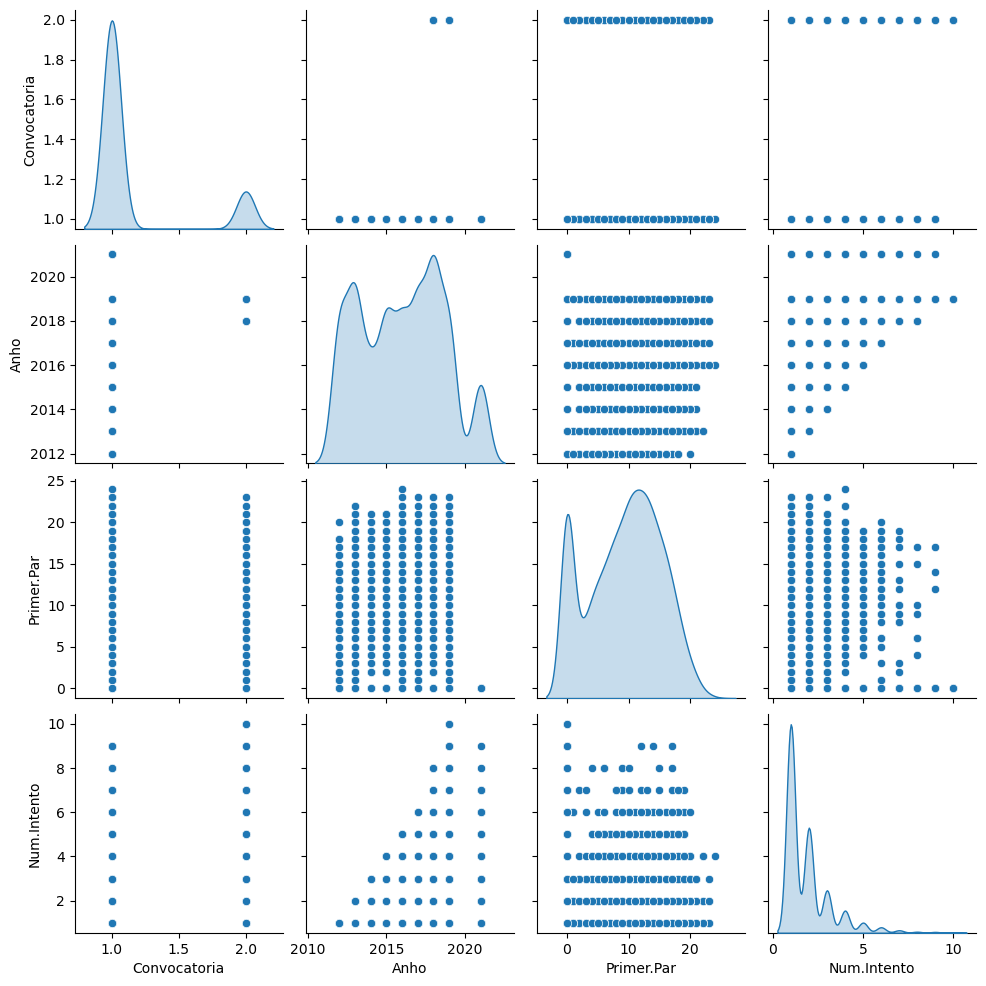

In [25]:
sns.pairplot(data=new_train_x, diag_kind='kde')

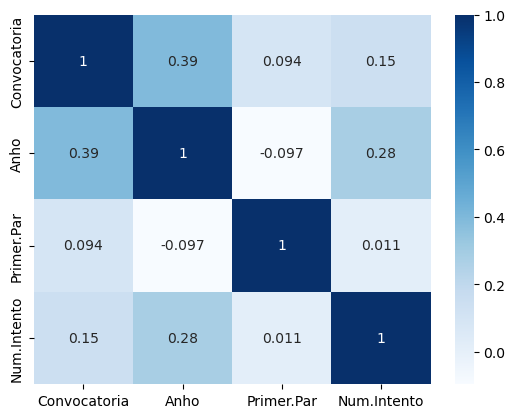

In [26]:
sns.heatmap(new_train_x[['Convocatoria', 'Anho', 'Primer.Par', 'Num.Intento']].corr(), cmap='Blues', annot=True)
plt.show()

In [27]:
LR = LogisticRegression()
process(LR,new_train_x,train_y,new_test_x,test_y,course)

Model score for estatica: 0.7626943005181347
Parameters: 
['Convocatoria' 'Anho' 'Primer.Par' 'Num.Intento']
iterations: [48]
coefs: [[-0.42170567 -0.00149807  0.28778287 -0.0182877 ]]


In [29]:
%%capture
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": new_train_x,
    "y": train_y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([LR, SGDC]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

C:\Users\josec\anaconda3\envs\IA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


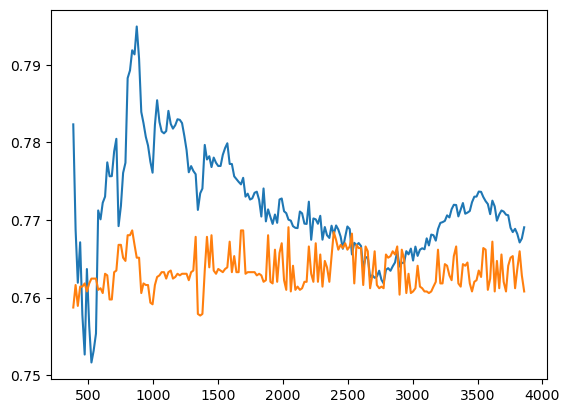

In [30]:
from sklearn.model_selection import learning_curve



train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(LR, new_x, y, return_times=True, train_sizes=np.linspace(0.1, 1.0, 200))

plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))



# Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()
#columns = ['Convocatoria', 'Anho', 'Primer.Par', 'Num.Intento']
columns = ['Convocatoria', 'Anho', 'Primer.Par']
scaled_train_x = sc.fit_transform(new_train_x[columns])
scaled_test_x = sc.transform(new_test_x[columns])
scaled_train_x = pd.DataFrame(scaled_train_x, index=new_train_x.index, columns=columns)
scaled_test_x = pd.DataFrame(scaled_test_x, index=new_test_x.index, columns=columns)
scaled_train_x = pd.concat([scaled_train_x, new_train_x['Num.Intento']],axis=1)
scaled_test_x = pd.concat([scaled_test_x, new_test_x['Num.Intento']],axis=1)
scaled_train_x

,Convocatoria,Anho,Primer.Par,Num.Intento
25545,-0.423558,-0.757907,-0.228085,3.0
58713,-0.423558,0.378218,-0.571102,1.0
95057,-0.423558,1.893051,-1.600152,6.0
94875,-0.423558,1.893051,-1.600152,1.0
36477,-0.423558,-0.379199,-0.056577,1.0
...,...,...,...,...
48228,-0.423558,-0.000491,-0.571102,2.0
87740,2.360954,1.135634,-1.428644,3.0
47004,-0.423558,-0.000491,0.800965,2.0
63303,-0.423558,0.756926,-1.085627,2.0


In [33]:
process(LR,scaled_train_x,train_y,scaled_test_x,test_y,course)

Model score for estatica: 0.7616580310880829
Parameters: 
['Convocatoria' 'Anho' 'Primer.Par' 'Num.Intento']
iterations: [13]
coefs: [[-0.00730819 -0.35987397  1.71656677  0.05419793]]


In [34]:
process(SGDC,scaled_train_x,train_y,scaled_test_x,test_y,course)

Model score for estatica: 0.7668393782383419
Parameters: 
['Convocatoria' 'Anho' 'Primer.Par' 'Num.Intento']
iterations: 48
coefs: [[-5.83730354e-02 -2.69071980e-01  1.92365656e+00  1.88556548e-03]]


# Kmeans

In [35]:
from sklearn.cluster import KMeans
features=['Convocatoria','Anho','Primer.Par','Num.Intento']
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_train_x[features])
scaled_train_x['tipo.Alumno'] = kmeans.predict(scaled_train_x[features])
print(scaled_train_x)

scaled_test_x['tipo.Alumno'] = kmeans.predict(scaled_test_x[features])
#df['location_north']=df.apply(lambda x: get_north(x['location_northeast'], x['location_northwest']), axis=1)
#df['location_south']=df.apply(lambda x: get_south(x['location_southwest'], x['location_southeast']), axis=1)
#df['more_than_1_child']=df.children.apply(lambda x:1 if x>1 else 0)

       Convocatoria      Anho  Primer.Par  Num.Intento  tipo.Alumno
25545     -0.423558 -0.757907   -0.228085          3.0            0
58713     -0.423558  0.378218   -0.571102          1.0            0
95057     -0.423558  1.893051   -1.600152          6.0            1
94875     -0.423558  1.893051   -1.600152          1.0            0
36477     -0.423558 -0.379199   -0.056577          1.0            0
...             ...       ...         ...          ...          ...
48228     -0.423558 -0.000491   -0.571102          2.0            0
87740      2.360954  1.135634   -1.428644          3.0            2
47004     -0.423558 -0.000491    0.800965          2.0            0
63303     -0.423558  0.756926   -1.085627          2.0            0
58578     -0.423558  0.378218   -1.600152          1.0            0

[3859 rows x 5 columns]


C:\Users\josec\anaconda3\envs\IA\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
process(LR,scaled_train_x,train_y,scaled_test_x,test_y,course)

Model score for estatica: 0.7626943005181347
Parameters: 
['Convocatoria' 'Anho' 'Primer.Par' 'Num.Intento' 'tipo.Alumno']
iterations: [18]
coefs: [[ 0.06885563 -0.35407209  1.71812832  0.06414375 -0.12370753]]


# Quantile transformer

In [37]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(train_y)

qt = QuantileTransformer(output_distribution='normal')
transformed = qt.fit_transform(scaled_train_x)
transformed = pd.DataFrame(transformed, index=scaled_train_x.index, columns=scaled_train_x.columns)

transformed_test = qt.transform(scaled_test_x)
transformed_test = pd.DataFrame(transformed_test, index=scaled_test_x.index, columns=scaled_test_x.columns)

#sns.pairplot(data=transformed, diag_kind='kde')

process(LR,transformed,train_y,transformed_test,test_y,course)
#regr_trans.fit(scaled_train_x, y_transformed)
#yhat = regr_trans.predict(scaled_test_x)
#round(r2_score(test_y, yhat), 3), round(mean_absolute_error(test_y, yhat), 2), round(np.sqrt(mean_squared_error(test_y, yhat)),2)


Model score for estatica: 0.7481865284974093
Parameters: 
['Convocatoria' 'Anho' 'Primer.Par' 'Num.Intento' 'tipo.Alumno']
iterations: [20]
coefs: [[ 0.00892854 -0.00154243  1.19278925  0.04993581 -0.04783176]]


# Hyperparameter tuning


In [82]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [132]:
std_slc = StandardScaler()
pca = decomposition.PCA()
logistic_Reg = linear_model.LogisticRegression(solver='liblinear')

pipe = Pipeline(steps=[('scaler', StandardScaler()), ('pca', pca), ('logistic_Reg', logistic_Reg)])
n_components = list(range(1,new_train_x.shape[1]+1,1))

Cs = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

parameters = dict(pca__n_components=n_components,
                      scaler = [StandardScaler(), MinMaxScaler()],
                      logistic_Reg__Cs=Cs,
                      solver = ['newton-cg', 'lbfgs', 'liblinear'],
                      logistic_Reg__penalty=penalty,
                        )


clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(new_train_x, train_y)

print('Best scaler:',clf_GS.best_estimator_.get_params()['scaler'])
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

ValueError: Invalid parameter 'solver' for estimator Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('logistic_Reg', LogisticRegression(solver='liblinear'))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [114]:
columns = new_train_x.columns
squared_x = new_train_x.apply(np.square)
squared_x = squared_x.rename(columns={"Convocatoria": "C2", "Anho": "A2", "Primer.Par": "P2", "Num.Intento":"I2"})
squared_x = pd.concat([new_train_x,squared_x],axis=1)
#print(squared_x)
columns = new_test_x.columns
squared_test_x = new_test_x.apply(np.square)
squared_test_x = squared_test_x.rename(columns={"Convocatoria": "C2", "Anho": "A2", "Primer.Par": "P2", "Num.Intento":"I2"})
squared_test_x = pd.concat([new_test_x,squared_test_x],axis=1)
#print(squared_test_x)

In [113]:
std_slc = StandardScaler()
pca = decomposition.PCA()
logistic_Reg = linear_model.LogisticRegression(solver='liblinear')

pipe = Pipeline(steps=[('scaler', StandardScaler), ('pca', pca), ('logistic_Reg', logistic_Reg)])
n_components = list(range(1,squared_x.shape[1]+1,1))

C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      scaler = [StandardScaler(), MinMaxScaler()],
                      logistic_Reg__penalty=penalty)


clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(squared_x, train_y)

print('Best Scaler:',clf_GS.best_estimator_.get_params()['scaler'])
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

Best Scaler: MinMaxScaler()
Best Penalty: l2
Best C: 0.12648552168552957
Best Number Of Components: 6

LogisticRegression(C=0.12648552168552957, solver='liblinear')


In [122]:
n = 3
scaler = MinMaxScaler()
pca = decomposition.PCA(n_components=n)
logistic_Reg = linear_model.LogisticRegression(C=0.08685113737513521, solver='liblinear', penalty='l2')


pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('logistic_Reg', logistic_Reg)])
pipe.fit(new_train_x, train_y)
pipe.score(new_test_x, test_y)

0.7647668393782383

In [123]:
n = 6
scaler = MinMaxScaler()
pca = decomposition.PCA(n_components=n)
logistic_Reg = linear_model.LogisticRegression(C=0.12648552168552957, solver='liblinear', penalty = 'l2')


pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('logistic_Reg', logistic_Reg)])
pipe.fit(squared_x, train_y)
pipe.score(squared_test_x, test_y)

0.7658031088082902